# Project : Sakila Database

The Sakila sample database is designed to represent a DVD rental store. In this project, we will retrieve detailed information about relationship between films, actors, customers and payments...

Data source: https://www.kaggle.com/datasets/atanaskanev/sqlite-sakila-sample-database/data

Relationship diagram:

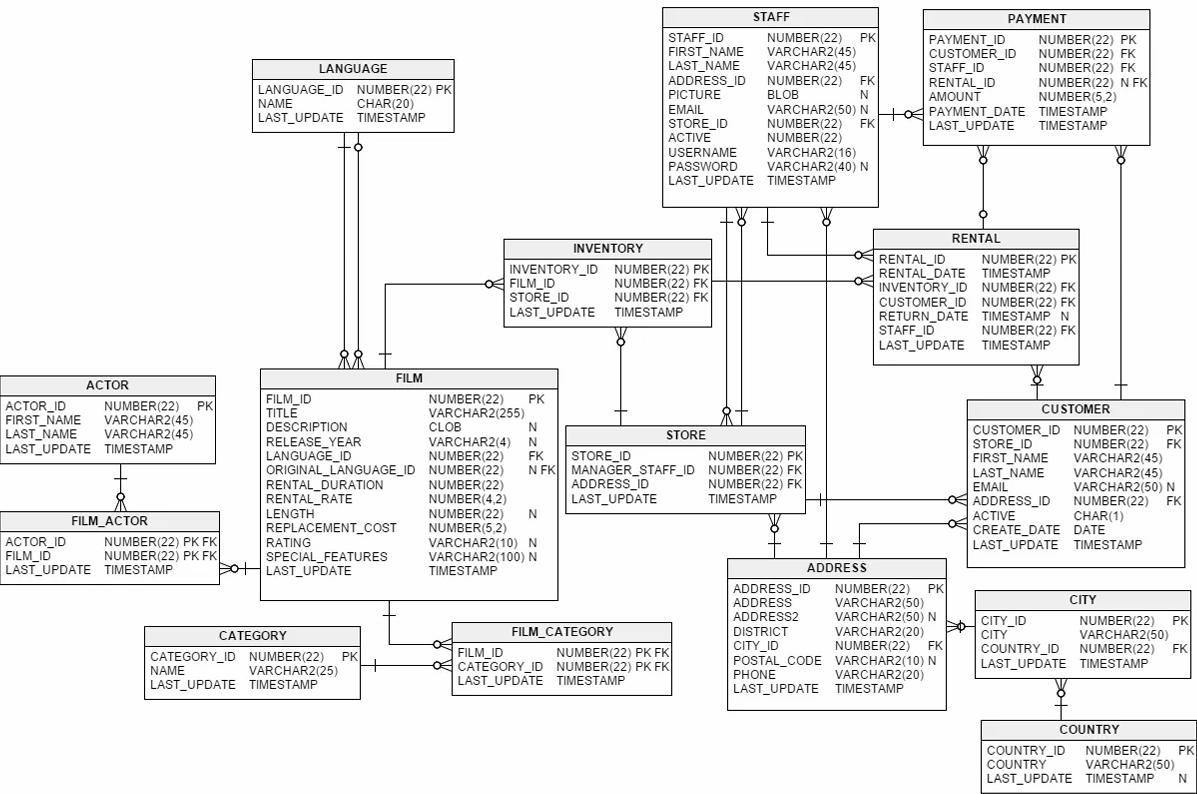

In [ ]:
from mysql.connector import connect
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
conn = connect(host='.....', user='...', password='....', database='sakila', port=...)
conn.is_connected()

True

In [30]:
cursor=conn.cursor()

### 1. Movies with a duration of over 120 minutes

In [31]:
sql='select title, length from film where length>120 order by length'
pd.read_sql(sql,conn)

C:\Users\Zenbook\AppData\Local\Temp\ipykernel_28632\4038152060.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(sql,conn)


,title,length
0,ARIZONA BANG,121
1,BOOGIE AMELIE,121
2,BRANNIGAN SUNRISE,121
3,DANGEROUS UPTOWN,121
4,HARRY IDAHO,121
...,...,...
452,MUSCLE BRIGHT,185
453,POND SEATTLE,185
454,SOLDIERS EVOLUTION,185
455,SWEET BROTHERHOOD,185


### 2. Movies with a rental rate from 2.99 to 4.99

In [32]:
sql='select title, rental_rate from film where rental_rate between 2.99 and 4.99'
pd.read_sql(sql,conn)

C:\Users\Zenbook\AppData\Local\Temp\ipykernel_28632\2277305554.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(sql,conn)


,title,rental_rate
0,ACE GOLDFINGER,4.99
1,ADAPTATION HOLES,2.99
2,AFFAIR PREJUDICE,2.99
3,AFRICAN EGG,2.99
4,AGENT TRUMAN,2.99
...,...,...
654,WRONG BEHAVIOR,2.99
655,WYOMING STORM,4.99
656,YENTL IDAHO,4.99
657,ZOOLANDER FICTION,2.99


### 3. List all movies and the actors in them

In [33]:
sql='''
select title, first_name, last_name
from film_actor fa
join actor a on fa.actor_id=a.actor_id
join film f on fa.film_id=f.film_id
'''
pd.read_sql(sql,conn)

C:\Users\Zenbook\AppData\Local\Temp\ipykernel_28632\2542914164.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(sql,conn)


,title,first_name,last_name
0,ACADEMY DINOSAUR,PENELOPE,GUINESS
1,ANACONDA CONFESSIONS,PENELOPE,GUINESS
2,ANGELS LIFE,PENELOPE,GUINESS
3,BULWORTH COMMANDMENTS,PENELOPE,GUINESS
4,CHEAPER CLYDE,PENELOPE,GUINESS
...,...,...,...
5457,TELEGRAPH VOYAGE,THORA,TEMPLE
5458,TROJAN TOMORROW,THORA,TEMPLE
5459,VIRGINIAN PLUTO,THORA,TEMPLE
5460,WARDROBE PHANTOM,THORA,TEMPLE


### 4. Movies that were released in English

In [34]:
sql='''
select title, name
from film f
join language l on f.language_id=l.language_id
where name='English'
'''
pd.read_sql(sql,conn)

C:\Users\Zenbook\AppData\Local\Temp\ipykernel_28632\1395641569.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(sql,conn)


,title,name
0,ACADEMY DINOSAUR,English
1,ACE GOLDFINGER,English
2,ADAPTATION HOLES,English
3,AFFAIR PREJUDICE,English
4,AFRICAN EGG,English
...,...,...
995,YOUNG LANGUAGE,English
996,YOUTH KICK,English
997,ZHIVAGO CORE,English
998,ZOOLANDER FICTION,English


### 5. Customer information, store codes, and the addresses of the stores where they frequently rent movies

In [35]:
sql='''
select first_name, last_name, c.store_id, a.address
from customer c
join store s on c.store_id=s.store_id
join address a on a.address_id=s.address_id
'''
pd.read_sql(sql,conn)

C:\Users\Zenbook\AppData\Local\Temp\ipykernel_28632\3019498295.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(sql,conn)


,first_name,last_name,store_id,address
0,MARY,SMITH,1,47 MySakila Drive
1,PATRICIA,JOHNSON,1,47 MySakila Drive
2,LINDA,WILLIAMS,1,47 MySakila Drive
3,ELIZABETH,BROWN,1,47 MySakila Drive
4,MARIA,MILLER,1,47 MySakila Drive
...,...,...,...,...
594,ANDY,VANHORN,2,28 MySQL Boulevard
595,SALVADOR,TEEL,2,28 MySQL Boulevard
596,SETH,HANNON,2,28 MySQL Boulevard
597,RENE,MCALISTER,2,28 MySQL Boulevard


### 6. The number of times each movie has been rented

In [36]:
sql='''
select title, count(r.rental_id) as rent_count
from rental r
join inventory i on i.inventory_id=r.inventory_id
join film f on f.film_id=i.film_id
group by i.film_id
'''
pd.read_sql(sql,conn)

C:\Users\Zenbook\AppData\Local\Temp\ipykernel_28632\3480182879.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(sql,conn)


,title,rent_count
0,ACADEMY DINOSAUR,23
1,ACE GOLDFINGER,7
2,ADAPTATION HOLES,12
3,AFFAIR PREJUDICE,23
4,AFRICAN EGG,12
...,...,...
953,YOUNG LANGUAGE,7
954,YOUTH KICK,6
955,ZHIVAGO CORE,9
956,ZOOLANDER FICTION,17


### 7. Customers who have made more than 20 payments

In [37]:
sql='''
select first_name, last_name, count(payment_id) as payment_count
from payment p
join customer c on c.customer_id = p.customer_id
group by c.customer_id
having payment_count > 20
'''
pd.read_sql(sql,conn)

C:\Users\Zenbook\AppData\Local\Temp\ipykernel_28632\2004196160.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(sql,conn)


,first_name,last_name,payment_count
0,MARY,SMITH,32
1,PATRICIA,JOHNSON,27
2,LINDA,WILLIAMS,26
3,BARBARA,JONES,22
4,ELIZABETH,BROWN,38
...,...,...,...
538,EDUARDO,HIATT,27
539,TERRENCE,GUNDERSON,30
540,ENRIQUE,FORSYTHE,28
541,FREDDIE,DUGGAN,25


### 8. The number of movies by rating

In [38]:
sql='''
select rating, count(*) as total_films
from film
group by rating
'''
pd.read_sql(sql,conn)

C:\Users\Zenbook\AppData\Local\Temp\ipykernel_28632\2989352506.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(sql,conn)


,rating,total_films
0,PG,194
1,G,178
2,NC-17,210
3,PG-13,223
4,R,195


### 9. Customers who have rented movies more than 25 times

In [39]:
sql='''
select first_name, last_name, count(rental_id) as rental_count
from rental r
join customer c on c.customer_id = r.customer_id
group by c.customer_id
having rental_count > 25
'''
pd.read_sql(sql,conn)

C:\Users\Zenbook\AppData\Local\Temp\ipykernel_28632\51609584.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(sql,conn)


,first_name,last_name,rental_count
0,MARY,SMITH,32
1,PATRICIA,JOHNSON,27
2,LINDA,WILLIAMS,26
3,ELIZABETH,BROWN,38
4,JENNIFER,DAVIS,28
...,...,...,...
344,TERRANCE,ROUSH,29
345,RENE,MCALISTER,26
346,EDUARDO,HIATT,27
347,TERRENCE,GUNDERSON,30


### 10. The average number of movies rented by each customer

In [40]:
sql='''
select first_name, last_name, avg(rental_id) as avg_rentals
from rental r
join customer c on c.customer_id=r.customer_id
group by r.customer_id
'''
pd.read_sql(sql,conn)

C:\Users\Zenbook\AppData\Local\Temp\ipykernel_28632\309002638.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(sql,conn)


,first_name,last_name,avg_rentals
0,MARY,SMITH,7535.5313
1,PATRICIA,JOHNSON,9545.0370
2,LINDA,WILLIAMS,7928.8846
3,BARBARA,JONES,8962.4545
4,ELIZABETH,BROWN,7917.2895
...,...,...,...
594,TERRENCE,GUNDERSON,8314.5333
595,ENRIQUE,FORSYTHE,8248.2500
596,FREDDIE,DUGGAN,8750.8800
597,WADE,DELVALLE,8102.9545


### 11. Movies with a rental price higher than the average rental price

In [41]:
sql='''
select title, rental_rate
from film
where rental_rate > (select avg(rental_rate) from film)
'''
pd.read_sql(sql,conn)

C:\Users\Zenbook\AppData\Local\Temp\ipykernel_28632\987480437.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(sql,conn)


,title,rental_rate
0,ACE GOLDFINGER,4.99
1,ADAPTATION HOLES,2.99
2,AFFAIR PREJUDICE,2.99
3,AFRICAN EGG,2.99
4,AGENT TRUMAN,2.99
...,...,...
654,WRONG BEHAVIOR,2.99
655,WYOMING STORM,4.99
656,YENTL IDAHO,4.99
657,ZOOLANDER FICTION,2.99


### 12. Customers who rented "ACADEMY DINOSAUR"

In [42]:
sql='''
select c.first_name, c.last_name
from customer c
join rental r on r.customer_id=c.customer_id
join inventory i on i.inventory_id= r.inventory_id
join film f on f.film_id = i.film_id
where f.title='ACADEMY DINOSAUR'
'''
pd.read_sql(sql,conn)

C:\Users\Zenbook\AppData\Local\Temp\ipykernel_28632\2442682277.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(sql,conn)


,first_name,last_name
0,JOEL,FRANCISCO
1,GABRIEL,HARDER
2,DIANNE,SHELTON
3,NORMAN,CURRIER
4,BEATRICE,ARNOLD
5,GERALDINE,PERKINS
6,VIRGIL,WOFFORD
7,WILLIE,MARKHAM
8,DEBRA,NELSON
9,DARREN,WINDHAM


### 13. Customer with the highest total payment

In [43]:
sql='''
select first_name, last_name, sum(amount) as total_payment
from customer c
join payment p on c.customer_id = p.customer_id
group by c.customer_id
order by total_payment desc
limit 1
'''
pd.read_sql(sql,conn)

C:\Users\Zenbook\AppData\Local\Temp\ipykernel_28632\2675287633.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(sql,conn)


,first_name,last_name,total_payment
0,KARL,SEAL,221.55


### 14. Movies with the total number of rentals by genre

In [44]:
sql='''
select c.name, f.title, count(r.rental_id) as rental_count
from film_category fc
join category c on fc.category_id = c.category_id
join film f on f.film_id = fc.film_id
join inventory i on i.film_id = f.film_id
join rental r on r.inventory_id = i.inventory_id
group by c.name, f.title
'''
pd.read_sql(sql,conn)

C:\Users\Zenbook\AppData\Local\Temp\ipykernel_28632\1338375857.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(sql,conn)


,name,title,rental_count
0,Action,AMADEUS HOLY,21
1,Action,AMERICAN CIRCUS,22
2,Action,ANTITRUST TOMATOES,10
3,Action,BAREFOOT MANCHURIAN,18
4,Action,BERETS AGENT,21
...,...,...,...
953,Travel,VALENTINE VANISHING,12
954,Travel,WINDOW SIDE,12
955,Travel,WOLVES DESIRE,21
956,Travel,WORKER TARZAN,15


### 15. Movies that have never beem rented 

In [45]:
sql='''
select title from film where film_id not in (select film_id from inventory)
'''
pd.read_sql(sql,conn)

C:\Users\Zenbook\AppData\Local\Temp\ipykernel_28632\3807576023.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(sql,conn)


,title
0,ALICE FANTASIA
1,APOLLO TEEN
2,ARGONAUTS TOWN
3,ARK RIDGEMONT
4,ARSENIC INDEPENDENCE
5,BOONDOCK BALLROOM
6,BUTCH PANTHER
7,CATCH AMISTAD
8,CHINATOWN GLADIATOR
9,CHOCOLATE DUCK


### 16. Movies with more than 5 actors 

In [46]:
sql='''
select title, count(*) as actor_count
from film_actor fa
join actor a on fa.actor_id=a.actor_id
join film f on fa.film_id=f.film_id
group by title
having actor_count > 5
order by title
'''
pd.read_sql(sql,conn)

C:\Users\Zenbook\AppData\Local\Temp\ipykernel_28632\1870274251.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(sql,conn)


,title,actor_count
0,ACADEMY DINOSAUR,10
1,AGENT TRUMAN,7
2,ALABAMA DEVIL,9
3,ALADDIN CALENDAR,8
4,ALASKA PHANTOM,7
...,...,...
451,WORKER TARZAN,9
452,WORLD LEATHERNECKS,8
453,WRONG BEHAVIOR,9
454,WYOMING STORM,6


### 17. Customers who had rented movies but have not returned them

In [47]:
sql='''
select first_name, last_name
from rental r
join customer c
on c.customer_id=r.customer_id
where return_date is null
'''
pd.read_sql(sql,conn)

C:\Users\Zenbook\AppData\Local\Temp\ipykernel_28632\2653776764.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(sql,conn)


,first_name,last_name
0,GAIL,KNIGHT
1,GREGORY,MAULDIN
2,LOUISE,JENKINS
3,WILLIE,HOWELL
4,EMILY,DIAZ
...,...,...
178,JESSIE,BANKS
179,RAFAEL,ABNEY
180,STEPHANIE,MITCHELL
181,REGINA,BERRY


### 18. The number of customers per store

In [48]:
sql='''
select store_id, count(*) as customer_count from customer group by store_id
'''
pd.read_sql(sql,conn)

C:\Users\Zenbook\AppData\Local\Temp\ipykernel_28632\4218479982.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql(sql,conn)


,store_id,customer_count
0,1,326
1,2,273


### 19.  The number of movies per genre

In [49]:
sql='''
select name as category_name, count(*) as total_films
from category c
join film_category f
on c.category_id=f.category_id
group by f.category_id
'''
df_film_cat=pd.read_sql(sql,conn)
df_film_cat

C:\Users\Zenbook\AppData\Local\Temp\ipykernel_28632\1117845953.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_film_cat=pd.read_sql(sql,conn)


,category_name,total_films
0,Action,64
1,Animation,66
2,Children,60
3,Classics,57
4,Comedy,58
5,Documentary,68
6,Drama,62
7,Family,69
8,Foreign,73
9,Games,61


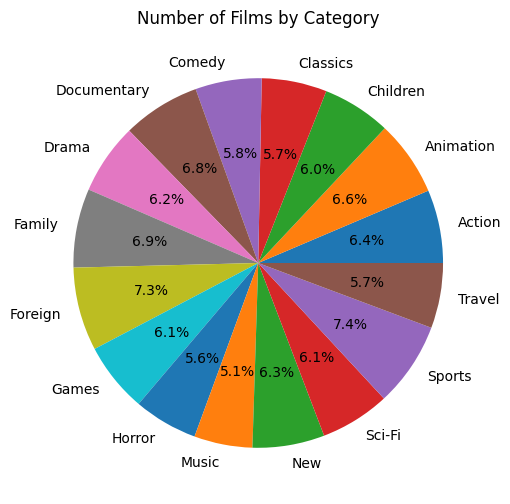

In [50]:
plt.figure(figsize=(10,6))
plt.pie(df_film_cat['total_films'], labels=df_film_cat['category_name'], autopct='%.1f%%')
plt.title('Number of Films by Category')
plt.show()

### 20. Statistics of the number of movies by duration range

In [51]:
sql='''
select '60-120 mins' as length_range, count(*) as total_films from film where length between 60 and 120
union
select 'Less than 60 mins', count(*) from film where length < 60
union
select 'More than 120 mins', count(*) from film where length > 120
'''
df_film_length=pd.read_sql(sql,conn)
df_film_length

C:\Users\Zenbook\AppData\Local\Temp\ipykernel_28632\4258401651.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_film_length=pd.read_sql(sql,conn)


,length_range,total_films
0,60-120 mins,447
1,Less than 60 mins,96
2,More than 120 mins,457


C:\Users\Zenbook\AppData\Local\Temp\ipykernel_28632\2435447157.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df_film_length, x='length_range', y='total_films', palette='deep')


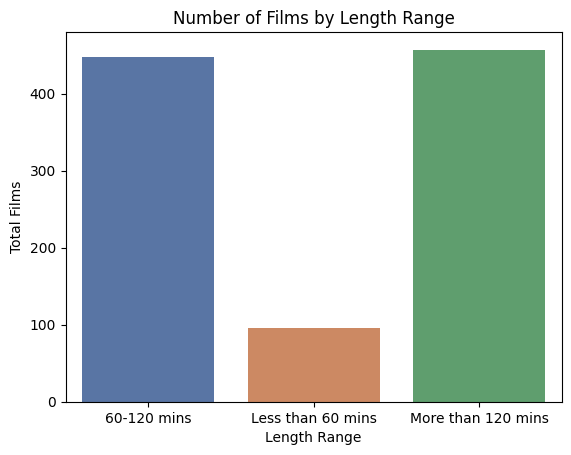

In [52]:
sns.barplot(df_film_length, x='length_range', y='total_films', palette='deep')
plt.title('Number of Films by Length Range')
plt.xlabel('Length Range')
plt.ylabel('Total Films')
plt.show()